In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df.shape

(381109, 12)

In [5]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

* No null Value

# EDA

Analysing every feature.

## Univariate Analysis

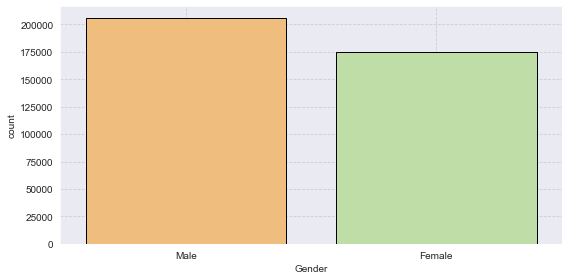

In [6]:
plt.figure(figsize=(8,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.countplot(x=df['Gender'],palette='Spectral',saturation=0.8,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

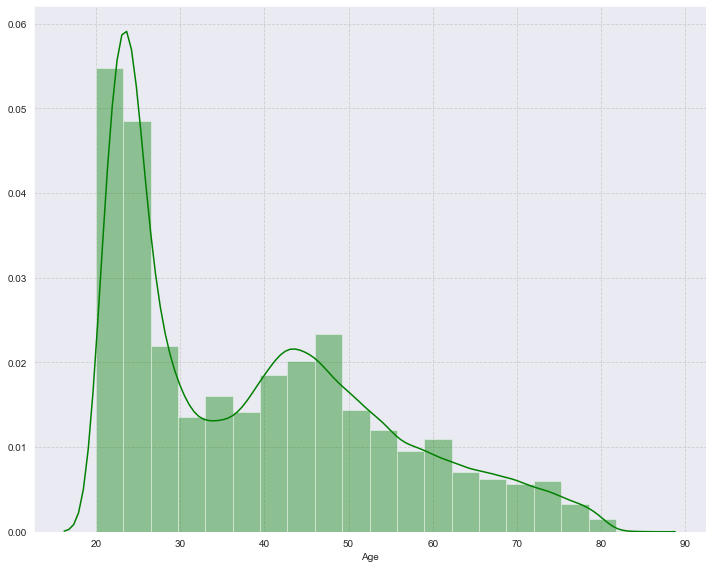

In [7]:
plt.figure(figsize=(10,8))
sns.distplot(df['Age'],bins=20,color='green')
plt.tight_layout()
plt.grid(True)
plt.show()

In [8]:
df['Age'].describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

most of them are young

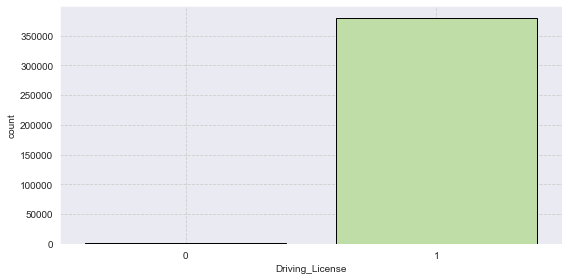

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Driving_License'],palette='Spectral',saturation=0.8,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [10]:
df['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

lets check whether the person without DL is interested for Vehicle insurance or not

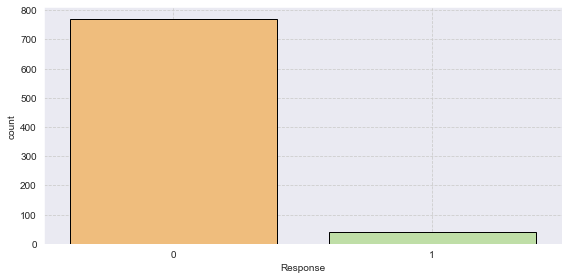

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(x=df[df['Driving_License']==0]['Response'],palette='Spectral',saturation=0.8,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [12]:
df[df['Driving_License']==0]['Response'].value_counts()

0    771
1     41
Name: Response, dtype: int64

Only 41 customer out of 812 who doesnt have DL are interetsed for Vehicle Insurance. Hence this feature is not very useful for model building

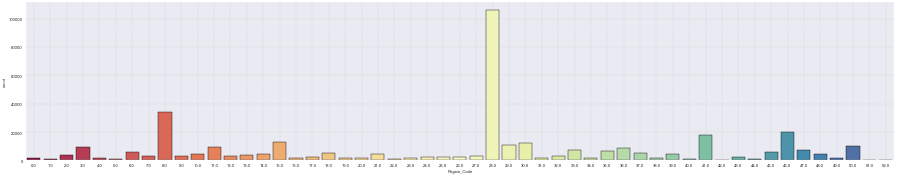

In [41]:
plt.figure(figsize=(30,6),dpi=30)
sns.countplot(x=df['Region_Code'],palette='Spectral',saturation=0.8,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

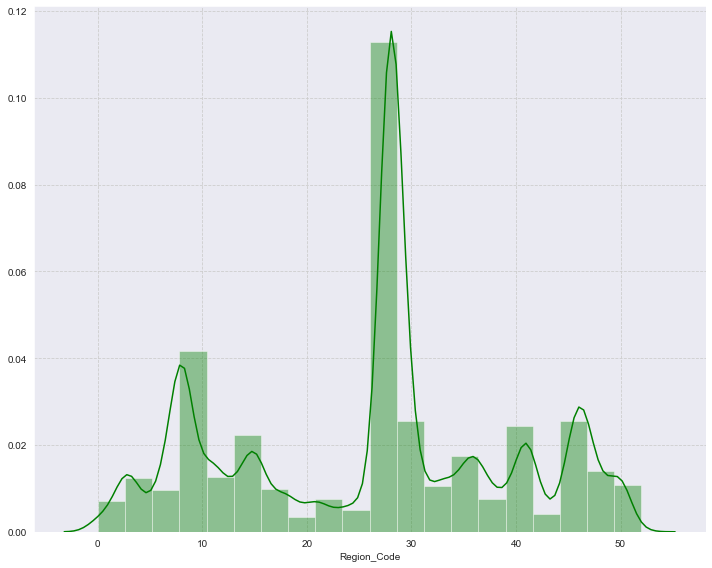

In [42]:
plt.figure(figsize=(10,8))
sns.distplot(df['Region_Code'],bins=20,color='green')
plt.tight_layout()
plt.grid(True)
plt.show()

In [33]:
df['Region_Code'].nunique()

53

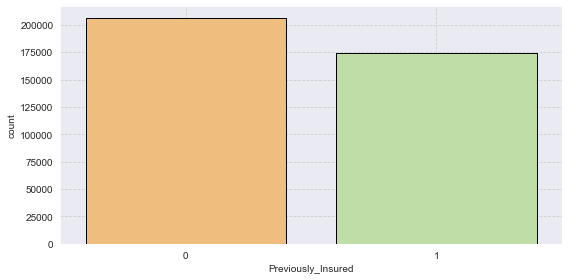

In [14]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Previously_Insured'],palette='Spectral',saturation=0.8,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [15]:
df['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

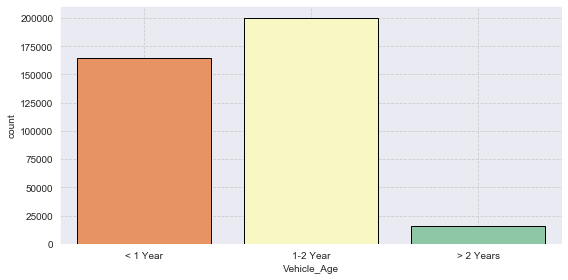

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Vehicle_Age'],palette='Spectral',saturation=0.8,edgecolor="black",order=['< 1 Year','1-2 Year','> 2 Years'])
plt.tight_layout()
plt.grid(True)
plt.show()

In [17]:
df['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

Frequency of customer with vehicle of age more than 2 years are very low.

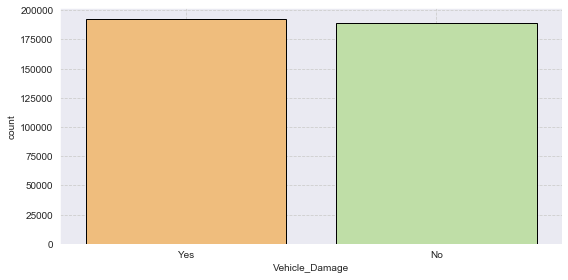

In [18]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Vehicle_Damage'],palette='Spectral',saturation=0.8,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [19]:
df['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

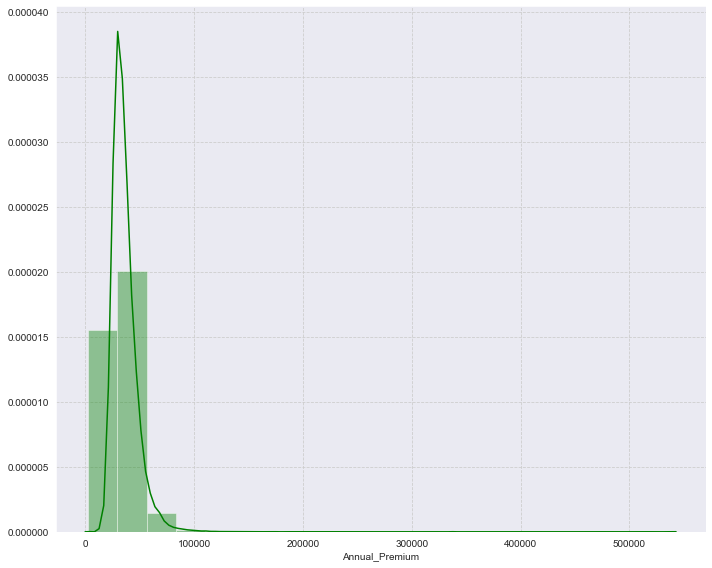

In [20]:
plt.figure(figsize=(10,8))
sns.distplot(df['Annual_Premium'],bins=20,color='green')
plt.tight_layout()
plt.grid(True)
plt.show()

In [21]:
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

highly positivley skewed data. Will try to perform some feature engeering on it to get most of the information from this feature

In [22]:
df['Policy_Sales_Channel'].nunique()

155

In [23]:
df['Policy_Sales_Channel'].unique()

array([ 26., 152., 160., 124.,  14.,  13.,  30., 156., 163., 157., 122.,
        19.,  22.,  15., 154.,  16.,  52., 155.,  11., 151., 125.,  25.,
        61.,   1.,  86.,  31., 150.,  23.,  60.,  21., 121.,   3., 139.,
        12.,  29.,  55.,   7.,  47., 127., 153.,  78., 158.,  89.,  32.,
         8.,  10., 120.,  65.,   4.,  42.,  83., 136.,  24.,  18.,  56.,
        48., 106.,  54.,  93., 116.,  91.,  45.,   9., 145., 147.,  44.,
       109.,  37., 140., 107., 128., 131., 114., 118., 159., 119., 105.,
       135.,  62., 138., 129.,  88.,  92., 111., 113.,  73.,  36.,  28.,
        35.,  59.,  53., 148., 133., 108.,  64.,  39.,  94., 132.,  46.,
        81., 103.,  90.,  51.,  27., 146.,  63.,  96.,  40.,  66., 100.,
        95., 123.,  98.,  75.,  69., 130., 134.,  49.,  97.,  38.,  17.,
       110.,  80.,  71., 117.,  58.,  20.,  76., 104.,  87.,  84., 137.,
       126.,  68.,  67., 101., 115.,  57.,  82.,  79., 112.,  99.,  70.,
         2.,  34.,  33.,  74., 102., 149.,  43.,   

There are total 155 Policy sales channel

In [24]:
df['Vintage'].describe()

count    381109.000000
mean        154.347397
std          83.671304
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64

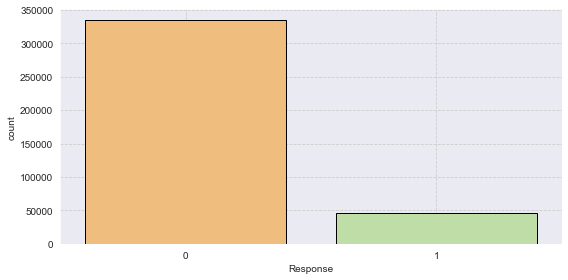

In [25]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Response'],palette='Spectral',saturation=0.8,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [26]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

## Multivariate Analysis

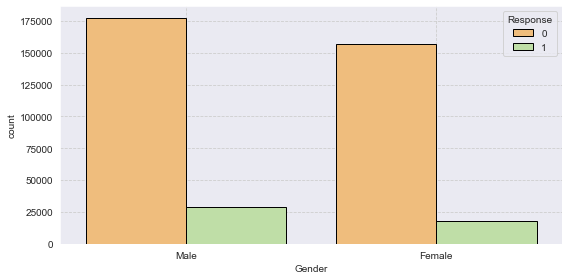

In [27]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Gender'],hue=df['Response'],palette='Spectral',saturation=0.8,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [28]:
pd.DataFrame(df.groupby(['Gender','Response'])['Gender'].count())

Gender
Gender Response        
Female 0         156835
       1          18185
Male   0         177564
       1          28525

In [29]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


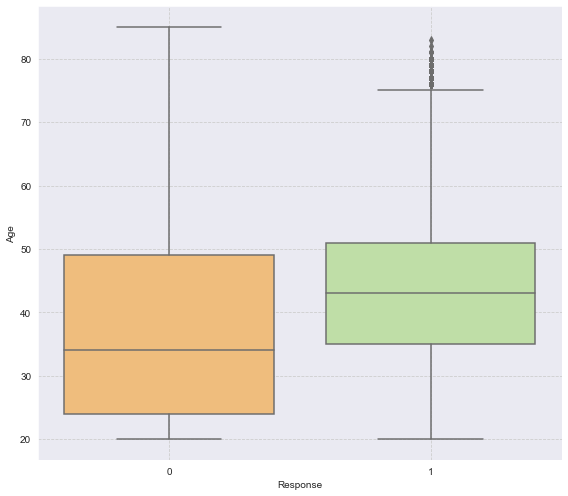

In [30]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Response',y='Age',data=df,palette='Spectral',saturation=0.8)
plt.tight_layout()
plt.grid(True)
plt.show()

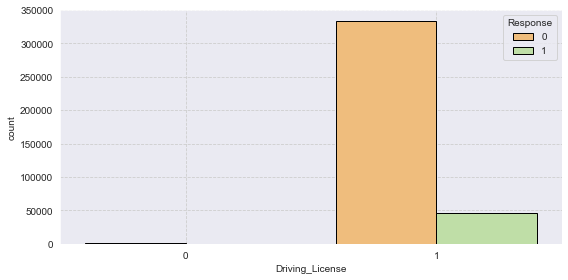

In [34]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Driving_License'],hue=df['Response'],palette='Spectral',saturation=0.8,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [35]:
pd.DataFrame(df.groupby(['Driving_License','Response'])['Driving_License'].count())

Driving_License
Driving_License Response                 
0               0                     771
                1                      41
1               0                  333628
                1                   46669

* Customers who are interested in Vehicle Insurance almost all have driving license

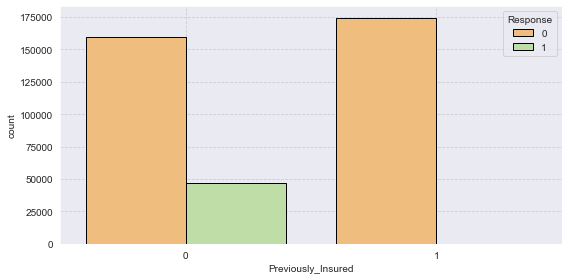

In [43]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Previously_Insured'],hue=df['Response'],palette='Spectral',saturation=0.8,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [44]:
pd.DataFrame(df.groupby(['Previously_Insured','Response'])['Previously_Insured'].count())

Previously_Insured
Previously_Insured Response                    
0                  0                     159929
                   1                      46552
1                  0                     174470
                   1                        158

* Customer who are not perviosly insured are likely to be inetrested